# Vergleichmethode RandomForest

## für BERT Encoding

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

In [23]:
Bert_title_train = pd.read_hdf("../data/BERT/Bert_title_NN.h5", key="train")
Bert_title_test = pd.read_hdf("../data/BERT/Bert_title_NN.h5", key="test")

y_train = Bert_title_train['label']
X_train = Bert_title_train.drop('label',axis=1)
y_test = Bert_title_test['label']
X_test = Bert_title_test.drop('label',axis=1)

In [8]:
RF = RandomForestClassifier(n_estimators=100, max_depth=10,random_state=0,criterion='entropy')
RF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [36]:
y_pred = RF.predict(X_test)
y_pred_prob = RF.predict_proba(X_test)
y_pred_prob = y_pred_prob[:,1]

[0 1 1 ... 1 1 0]
              precision    recall  f1-score   support

           0       0.82      0.47      0.60      4016
           1       0.69      0.92      0.79      5185

   micro avg       0.72      0.72      0.72      9201
   macro avg       0.75      0.69      0.69      9201
weighted avg       0.75      0.72      0.71      9201

[[1892 2124]
 [ 426 4759]]


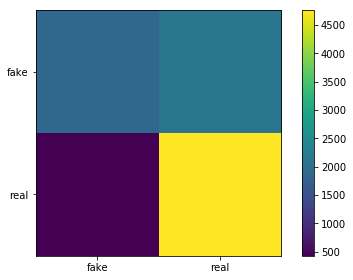

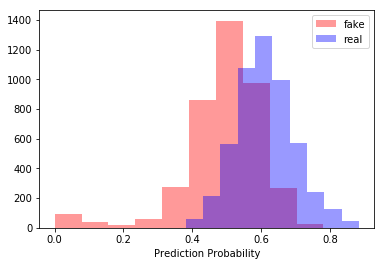

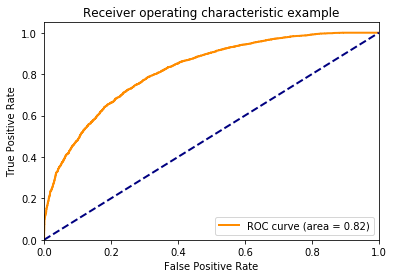

In [38]:
y_test_numpy = y_test.to_numpy()
print(y_pred)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred,
                       labels=[0,1]))
plt.imshow(confusion_matrix(y_test, y_pred,
                            labels=[0,1]))
plt.tight_layout()
plt.colorbar()
plt.xticks(range(2), ["fake", "real"])
plt.yticks(range(2), ["fake", "real"])
plt.show()
plt.close()

plt.hist(y_pred_prob[y_test == 0],label="fake", alpha = 0.4, color = "r")
plt.hist(y_pred_prob[y_test == 1],label = "real",alpha = 0.4, color = "b")
plt.xlabel("Prediction Probability")
plt.legend()
plt.show()
plt.close()

fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
